# saved to `mp3_to_csv.py`

In [ ]:
#! /home/aeatda/anaconda3/envs/proj3/bin/python

import sys
import os
import re
import pydub as pdb
import csv
# from freesound_api import *


# This script must be located in project/scripts, with the data in
# project/_data/prelim, to work properly. Otherwise the paths must be
# modified.

def write_to_csv(category):
    cat_path = '../_data/prelim_data/{}/'.format(category)
    
    names = [name for name in os.listdir(cat_path)
                   if re.search(r'.mp3$', name)]

    for name in names:
        file_arr = pdb.AudioSegment.from_mp3(cat_path + name)\
                      .get_array_of_samples().tolist()

        csv_loc = re.sub(r'_mono_mono.mp3', '.csv', name)
        print("Writing to {} in csv folder".format(csv_loc))

        try:
            with open('{0}csv/{1}'.format(cat_path, csv_loc), 'w') as outfile:
                writer = csv.writer(outfile)
                writer.writerow(file_arr)
            print("Success")
        except Exception as e:
            print("Failed with error: {}".format(e))


if __name__ == "__main__":
    args = sys.argv[1:]
    write_to_csv(*args)
    print("Done")

---

In [40]:
import os
import pydub as pdb
import csv
import re

In [44]:
names = [name for name in os.listdir('../_data/prelim_data/cry/') if re.search(r'.mp3$', name)]

In [45]:
names[0]

'0396_crying_331042_mono_mono.mp3'

In [46]:
re.sub(r'_mono_mono.mp3', '.csv', names[0])

'0396_crying_331042.csv'

In [4]:
file = pdb.AudioSegment.from_mp3()
file_arr = file1.get_array_of_samples().tolist()

with open('../_data/prelim_data/cry/csv/temp.csv', 'w') as outfile:
    writer = csv.writer(outfile)
    writer.writerow(file_arr)
    

In [31]:
def plot_stereo(chL, chR, srate=44100, bdepth=16, mono=False):
    assert len(chL) == len(chR)
    
    chL = chL / (2**(bdepth-1))
    chR = chR / (2**(bdepth-1))
    
    samps_per_ms = srate / 1000
    
    xx = np.arange(len(chL)) / samps_per_ms
    
    if mono:
        plt.figure(figsize=(8, 3))
        plt.plot(xx, chL)
        plt.xticks(np.arange(0, 1.1 * (len(chL)/samps_per_ms), int(len(chL)/100/samps_per_ms)*10))
        plt.ylim(-1.1, 1.1)
        plt.title("Mono")
        plt.xlabel("ms"); plt.ylabel("amplitude")

    else:
        plt.subplot(2, 1, 1)
        plt.plot(xx, chL)
        plt.xticks(np.arange(0, 1.1 * (len(chL)/samps_per_ms), int(len(chL)/100/samps_per_ms)*10))
        plt.ylim(-1.1, 1.1)
        plt.title("L")
        plt.xlabel("ms"); plt.ylabel("amplitude")

        plt.subplot(2, 1, 2)
        plt.plot(xx, chR)
        plt.xticks(np.arange(0, 1.1 * (len(chL)/samps_per_ms), int(len(chL)/100/samps_per_ms)*10))
        plt.ylim(-1.1, 1.1)
        plt.title("R")
        plt.xlabel("ms"); plt.ylabel("amplitude")

    plt.tight_layout()
    plt.show()
    

def plot_audio(audioseg):
    audioseg_list = audioseg.get_array_of_samples().tolist()

    if audioseg.channels == 2:
        mono = False
        chL = np.array(audioseg_list[::2])
        chR = np.array(audioseg_list[1::2])
    elif audioseg.channels == 1:
        mono = True
        chL = np.array(audioseg_list)
        chR = np.array(chL)
    else:
        print("More than 2 channels not supported")
        return

    plot_stereo(chL, chR, audioseg.frame_rate, audioseg.sample_width*8, mono)    

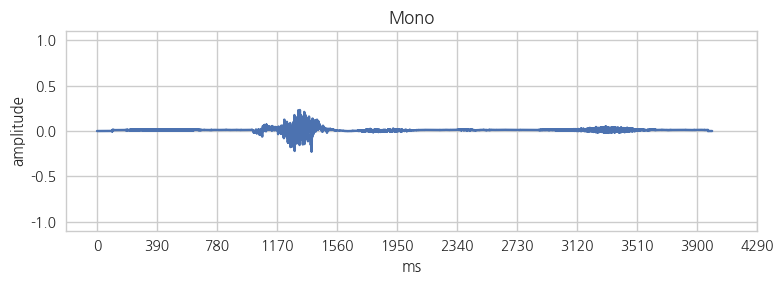

In [32]:
plot_audio(file1)

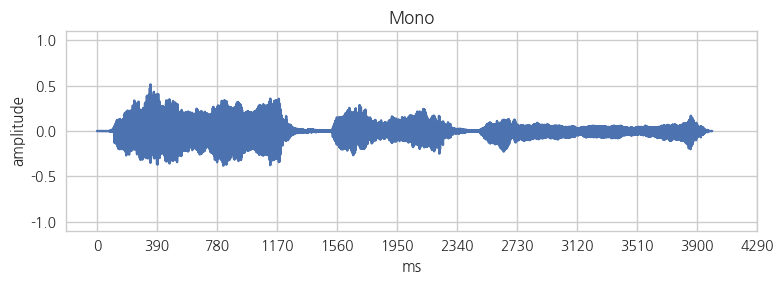

In [33]:
plot_audio(file2)

In [15]:
file2

In [6]:
file1